In [61]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import nltk
import itertools
import scipy.stats as ss
from nltk.corpus import wordnet
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [3]:
## cut the total number of entries used - 200,000 takes to long
job_description = pd.read_csv('Train_rev1.csv',
                              nrows= 10,
                              dtype = unicode)

In [4]:
print job_description.columns.values

['Id' 'Title' 'FullDescription' 'LocationRaw' 'LocationNormalized'
 'ContractType' 'ContractTime' 'Company' 'Category' 'SalaryRaw'
 'SalaryNormalized' 'SourceName']


In [15]:
description_list = list(job_description['FullDescription'])

In [31]:
## Tokenization

tokens = [nltk.word_tokenize(i) for i in description_list]
tokens = list(itertools.chain(*tokens))

In [40]:
## Tagging

tagged = nltk.pos_tag(tokens)
names = ["Token", "POS"]
tagged_df = pd.DataFrame(tagged)
tagged_df.columns = names

Part A: A1 - Top 5 parts of speech

NNP    525
NN     307
,      150
JJ     136
IN     136
dtype: int64

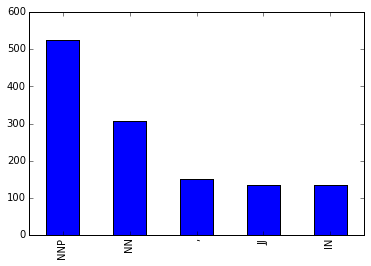

In [41]:
## Top 5 parts of speech 

POS_VC = tagged_df['POS'].value_counts()
POS_VC[:5].plot(kind = 'bar')
POS_VC[:5]

Part A: A2 - Zipf's Law with 100 most common words

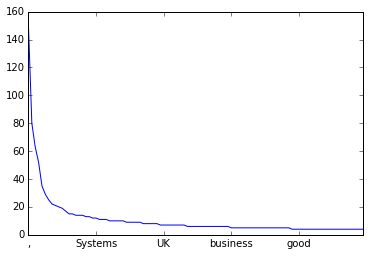

In [151]:
## 100 Most Common Words (not account for theoretical prediction of Zipf's Law)

Word_VC = tagged_df['Token'].value_counts()
Word_VC[:100].plot(kind = 'line')

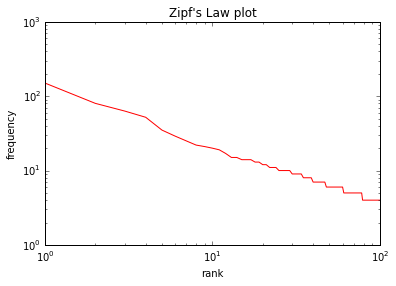

In [150]:
## Zipf's Law
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter

wc = dict(Counter(tokens))
sorted(wc.items(), key = lambda item: item[1])
freqs = wc.values()
freqs.sort(reverse=True)

## Only the 100 most common words
freqs = freqs[:100]

rf = [(r+1, f) for r, f in enumerate(freqs)]
rs, fs = zip(*rf)

## plot details

plt.clf()
plt.xscale('log')
plt.yscale('log')
plt.title('Zipf\'s Law plot')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.plot(rs, fs, 'r-')
plt.show()

Part A: A3 - 10 most common words with the removal of stopwards and lemmatization

Number of Stopwords removed = 494


,              150
.               63
Engineering     20
Analyst         14
experience      14
Recruitment     13
****            13
&               12
Systems         12
client          11
dtype: int64

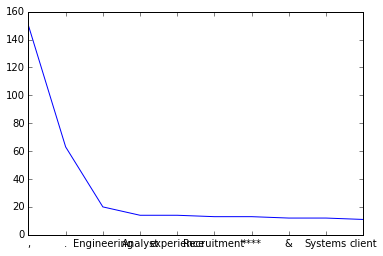

In [178]:
## Stop Word Removal (Results after stopwords are removed)

from nltk.corpus import stopwords
stop = stopwords.words('english')

no_stop = [word for word in tokens if word not in stop]
print "Number of Stopwords removed =", (len(tokens) - len(no_stop))

tagged_no_stop = nltk.pos_tag(no_stop)
names = ["Token_no_stop", "POS"]
tagged_no_stop_df = pd.DataFrame(tagged_no_stop)
tagged_no_stop_df.columns = names

no_stop_VC = tagged_no_stop_df['Token_no_stop'].value_counts()
no_stop_VC[:10].plot(kind = 'line')
no_stop_VC[:10]

,              150
.               63
Engineering     20
client          17
Analyst         14
experience      14
Recruitment     13
****            13
Systems         12
&               12
dtype: int64

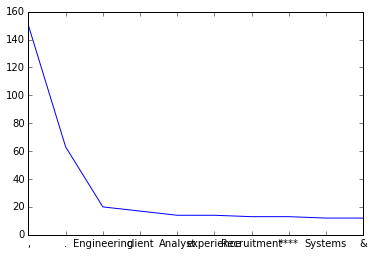

In [168]:
## Lemmatization (results after remaining words are lemmatized)

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized = [lemmatizer.lemmatize(word) for word in no_stop]
lemmatized_tagged = nltk.pos_tag(lemmatized)
names = ["Token_Lemmatized", "POS"]
lemmatized_tagged_df = pd.DataFrame(lemmatized_tagged)
lemmatized_tagged_df.columns = names

lematized_VC = lemmatized_tagged_df['Token_Lemmatized'].value_counts()
lematized_VC[:10].plot(kind = 'line')
lematized_VC[:10]